In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import accuracy_score

%matplotlib inline

In [100]:
def load_history(version):
    with open(f'./model_data/history_{version}.pkl', 'rb') as handle:
        return pickle.load(handle)

In [101]:
history = load_history('03')

In [102]:
history.keys()

dict_keys([(0.01, 1), (0.01, 2), (0.01, 3), (0.001, 1), (0.001, 2), (0.001, 3), (0.0001, 1), (0.0001, 2), (0.0001, 3), (1e-05, 1), (1e-05, 2), (1e-05, 3)])

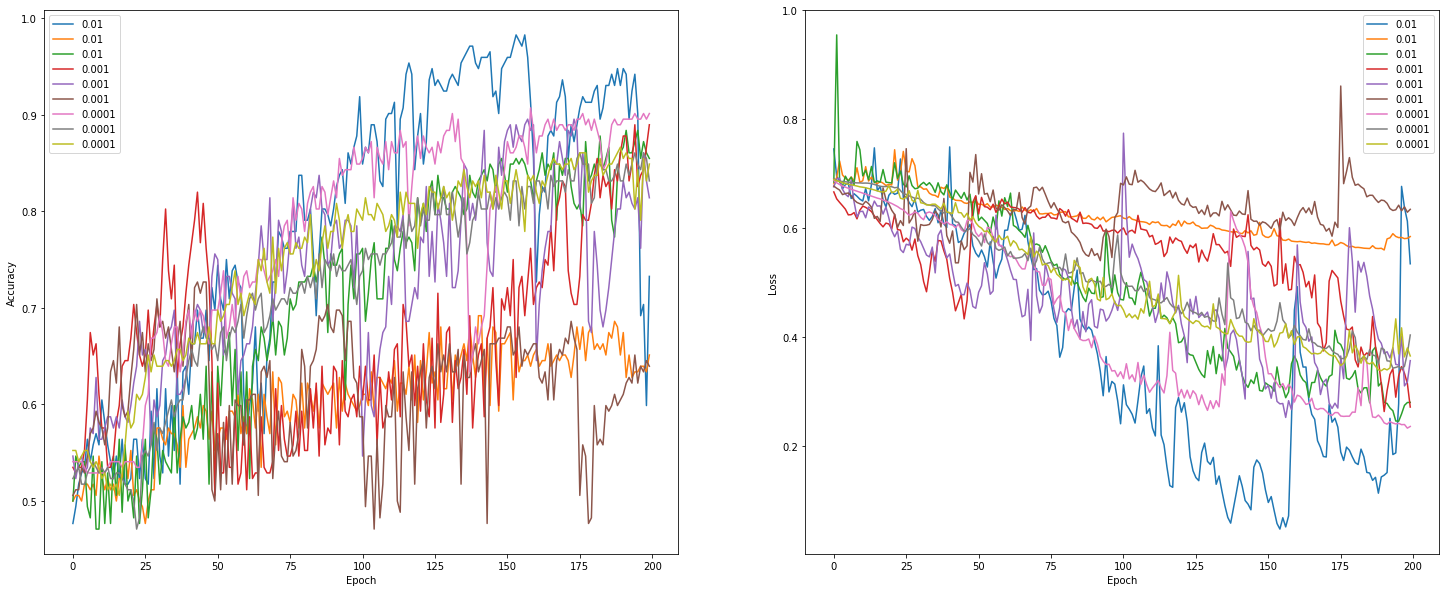

In [12]:
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

for hs in history:
    h = history[hs]
   

    #ax1.plot(h.history['acc'], label='train')
    ax1.plot(h.history['val_acc'], label=str(hs[0]))

    #ax2.plot(h.history['loss'], label='train')
    ax2.plot(h.history['val_loss'],  label=str(hs[0]))

    ax1.set_xlabel('Epoch')
    ax2.set_xlabel('Epoch')
    ax1.legend()
    ax2.legend()

    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')


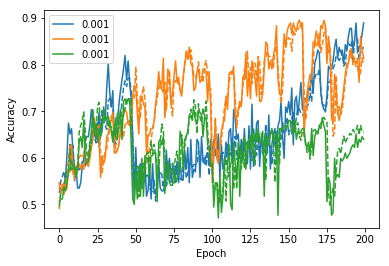

In [53]:
fig, ax = plt.subplots(1, figsize=(6,4))



for hs in history:
    h = history[hs]
    if hs[0]==0.001:
        line, = ax.plot(h.history['val_acc'], label=str(hs[0]))
        ax.plot(h.history['acc'],'--',  color=line.get_color())

        ax.set_xlabel('Epoch')
        ax.legend()
        ax.set_ylabel('Accuracy')


Text(0, 0.5, 'Loss')

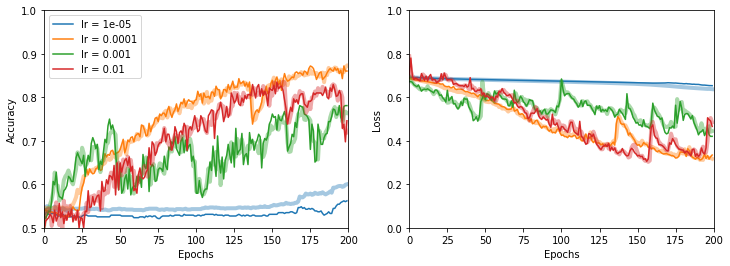

In [103]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(12,4))
lrs = sorted(set([x[0] for x in history.keys()]))
for lr in lrs:
    accuracy = np.mean([history[i].history['acc'] for i in history if i[0]==lr],0)
    accuracy_val = np.mean([history[i].history['val_acc'] for i in history if i[0]==lr],0)
    line, = ax.plot(accuracy_val, label=f'lr = {lr}')
    ax.plot(accuracy,  color=line.get_color(), alpha=0.4, linewidth=4)
    
    loss = np.mean([history[i].history['loss'] for i in history if i[0]==lr],0)
    loss_val = np.mean([history[i].history['val_loss'] for i in history if i[0]==lr],0)
    ax2.plot(loss_val, label=f'lr = {lr}', color=line.get_color())
    ax2.plot(loss,  color=line.get_color(), alpha=0.4, linewidth=4)
    
ax.legend(loc=2)
ax.set_xlim(0, len(accuracy))
ax.set_ylim(0.5, 1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

ax2.set_xlim(0, len(accuracy))
ax2.set_ylim(0, 1)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
